# House Prices: Advanced Regression Techniques EDA (Kaggle)

I am completing this EDA .ipynb for a course in the Master's of Data Science Program at Northwestern University titled MSDS 422: Practical Machine Learning. Note that I prefer to perform EDA on Tableau for ease and an ability to make many visualizations in a shorter manner of time.

## Background
This week, you are to become familiar with Kaggle.com and use the [House Prices Advanced Regression Techniques Kaggle competition](https://www.kaggle.com/c/house-prices-advanced-regression-techniques) to hone your Exploratory Data Analysis (EDA) skills. The dependent variable of interest is house prices in Ames, Iowa (‘SalePrice’). 

## Management/Research Question
In layman’s terms, what is the management/research question of interest, and why would anyone care?

## Requirements
You are to conduct EDA on the dataset as follows: 

1. Provide appropriate descriptive statistics and visualizations to help understand the marginal distribution of the dependent variable.
2. Investigate missing data and outliers.
3. Investigate at least three potential predictors of the dependent variable and provide appropriate graphs / statistics to demonstrate the relationships.
4. Engage in feature creation by splitting, merging, or otherwise generating a new predictor.
5. Using the dependent variable, perform both min-max and standard scaling in Python.
    
Some methods we will learn in this course (trees and random forests) are unaffected by monotonic transformations of the explanatory variables. Others (SVMs and neural networks) are very much affected by scaling and usually perform better when all explanatory variables have the same scale. It is often best to use scaling methods that preserve the shape of the distribution. But if there are extreme outliers or heavily skewed distributions, then log or normalizing transformations may be warranted.

## Deliverables and File Formats
Provide a double-spaced Adobe Acrobat document with a two-page maximum for the text. The paper should include a discussion of all graded elements but focus particularly on insights. Include your Python code and output as an appendix. Upload this as a single .pdf file.    

Comment often and in detail, highlighting major sections of code, describing the thinking behind the modeling and programming methods being employed.

## How I Will Tackle the EDA Requirements
1. Using `df.describe()`. Not sure how to show marginal distributions. Need to look this up.
2. Box and whisker plots show outliers well. Missing data is shown by using `df.info()`.
3. To investigate potential predictors, maybe a correlation heatmap or grid plot would be useful. Also, noticing differences between classes and sale price may present how differences in certain variables affect the sale price.
4. I will create some boolean variables that outline whether a home has a certain feature, such as a 2nd floor or a basement.
5. Min-max scaling, also known as normalization, is performed by scaling features to be between 0 and 1. Standardization subtracts the mean of each column to each data point in the column, and also divides each value in that column by the column's standard deviation. Thus, scaling is simply applying these formulas. To do this by "using the dependent variable", I am assuming it would involve scaling the training data only. However, I plan on scaling the entire dataset instead.

## 1) Descriptive Statistics and Visualizations

In [1]:
# import modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import numpy as np
from scipy.stats import pearsonr 
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# Figures inline and set visualization style
%matplotlib inline
sns.set()

In [2]:
# import the data
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
# store target variable of training data in a safe place
sale_price_train = train.SalePrice

# concatenate training and test sets for EDA
data = pd.concat([train.drop(['SalePrice'], axis=1), test])

In [4]:
# showing the first few rows of the data
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


**Insight:** Many, many columns that have a variety of values. I can already see many `NaN` values for later columns, such as the columns `PoolQC`, `Fence`, and `MiscFeature`. I will definitely need to utilize the data dictionary well since there are so many columns and so many values in the data set. Some are not intuitive to understand.

In [5]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,2919.000000,2919.000000,2433.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,...,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000
mean,1460.000000,57.137718,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,...,472.874572,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737
std,842.787043,42.517628,23.344905,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,455.610826,...,215.394815,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,730.500000,20.000000,59.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,...,320.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,1460.000000,50.000000,68.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,...,480.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2189.500000,70.000000,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,...,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


I cannot see the statistics for all columns, and numbers don't usually mean much to me. I will explore some basic statistics through visualization instead, such as by making box and whisker plots (useful for identifying outliers) and histograms.

In [6]:
# I want to see how many missing values there are for each column
# I also want to see the value type for each column
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

**Insight**: There are not many rows in the train data set (only 1460). Some columns have many, many null values, like `Alley`, `FireplaceQu`, `PoolQC`, `Fence`, and `MiscFeature`. We will need to decide if these null values are important; if not, we can drop them and not use them in our model for future assignments.

In [7]:
# saving column names into a list for easy access
# to use in building histograms and beyond
data_cols = data.columns.to_list()

In [8]:
# checking if a column that contains inputs of type str will return True
# with this
type(data[['SaleCondition']].dropna().reset_index(drop=True).loc[0][0]) == str

True

In [9]:
def plot_histograms(idx, df=data):
    """
    Creates a histogram grid for variables of interest from the data set. Prints out the next index we need to start
    from.
    
    Inputs:
        idx: int, the starting index
        
    Outputs:
        Histogram grid for variables of interest.
    """
    fig, axes = plt.subplots(3, 3, figsize=(18, 12))
    fig.suptitle('Histograms of Variables')
    df_cols = df.columns.to_list()
    for i in np.arange(0, 3):
        for j in np.arange(0, 3):
            # We only have a total of 80 columns
            if idx > 79:
                return
            col = df_cols[idx]
            
            # Can't plot histograms of objects or strings
            while type(df[[col]].dropna().reset_index(drop=True).loc[0][0]) == str:
                idx += 1
                if idx > 79:
                    return
                col = df_cols[idx]
            # Changing to an array for easy plotting
            col_data = np.array(df.dropna(subset=[col])[col].tolist())
            sns.histplot(ax=axes[i, j], x=col_data)
            
            # Plotting the mean of the col variable as a vertical line 
            # for easy interpretation
            axes[i,j].axvline(np.mean(col_data), color='red')
            axes[i,j].set_xlabel(col)
            idx += 1
    print(f"Next index we need to start from is: {idx}")

Next index we need to start from is: 27


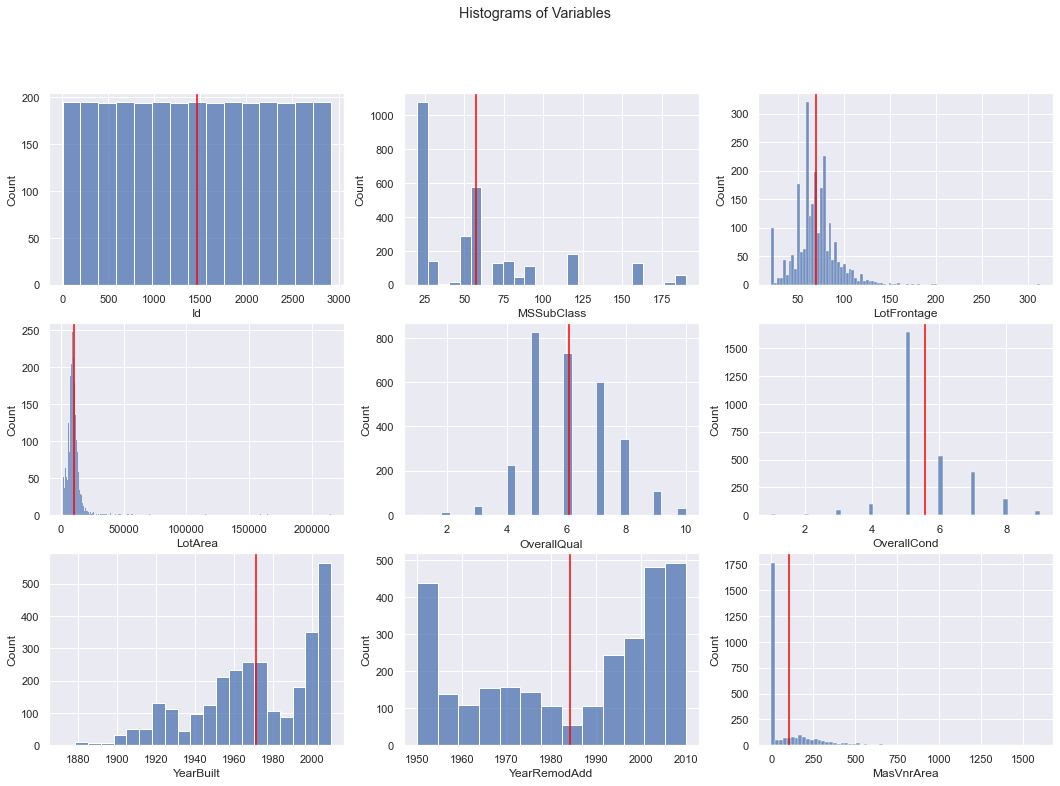

In [10]:
plot_histograms(0)

**Insights:** Many houses were recently built (after 2000). Many houses were remodeled after 2000 as well (over 500). We know there are 2919 total houses accounted for in this data set (the combined train and test sets). The overall quality and condition of homes are not well (between 4 and 6). Lot area is very skewed right. There may be some outliers, and plotting box plots will be useful.

Next index we need to start from is: 48


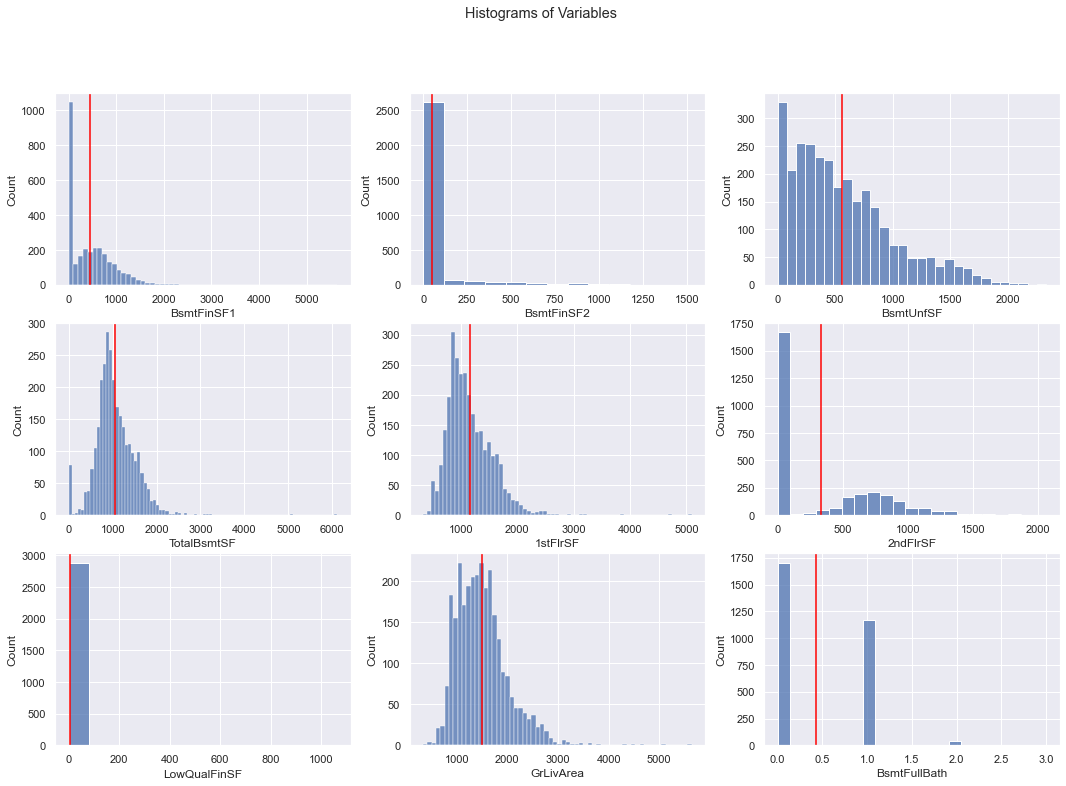

In [11]:
plot_histograms(27)

**Insights:** All of these presented distributions are right skewed. This histogram grid focuses on SQ mostly. It seems like most houses are relatively average size since the SQFT distributions are right skewed but have a rough mean of an average house (i.e., 1st floor sq ft mean is about 1200). Outliers in the data set might be really big houses that is not typical in Ames. 2nd Floor sq ft has the majority of data at around 0, meaning most houses are only 1 story and may likely have a basement (fairly common to not have a basement). The histogram of GrLivArea, which is above ground living area sq ft, confirms my assumptions; the mean for this variable lies at around 1500. 

Next index we need to start from is: 62


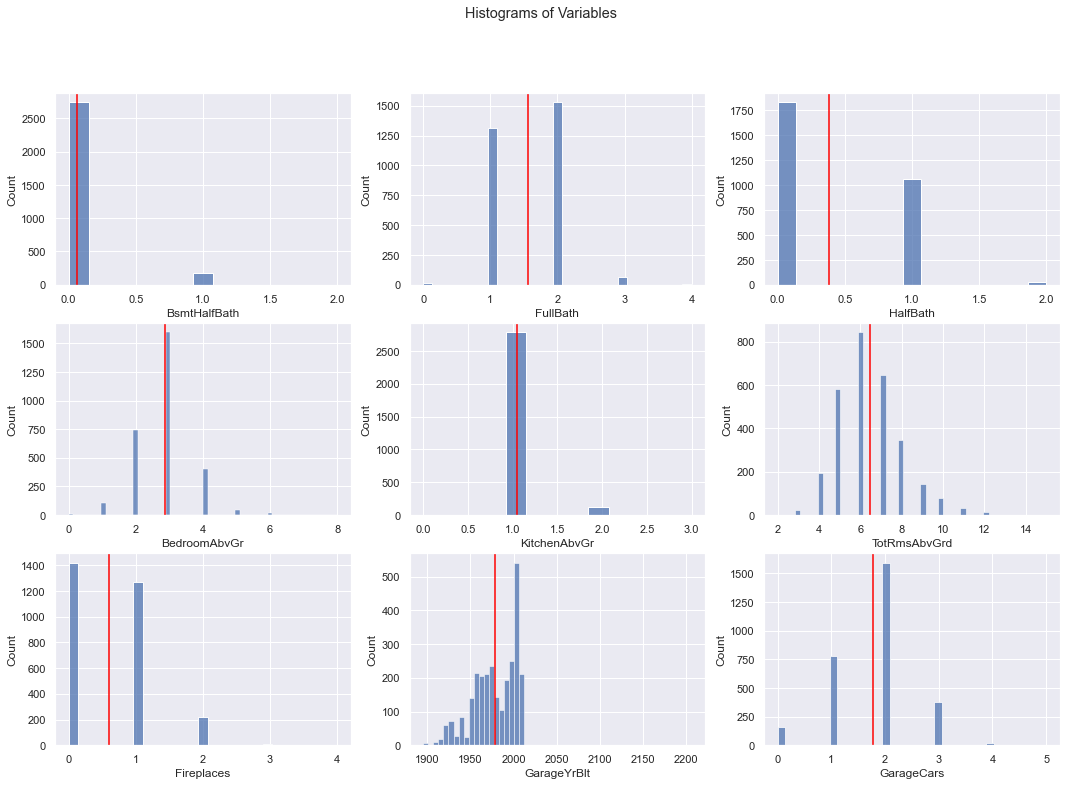

In [12]:
plot_histograms(48)

**Insights:** Most houses have 3 bedrooms above ground. But the `TotRmsAbvGrd` histogram shows that the mean is at around 6. So, what are these other rooms? According to the data dictionary, this variable does not include bathrooms. The vast majority of houses have either a single or no fireplace. The first distribution to have a left skew is the `GarageYrBlt` variable; most old houses thus did not have garages or could have built their garage recently. Most garages are 2 car garages.

Next index we need to start from is: 77


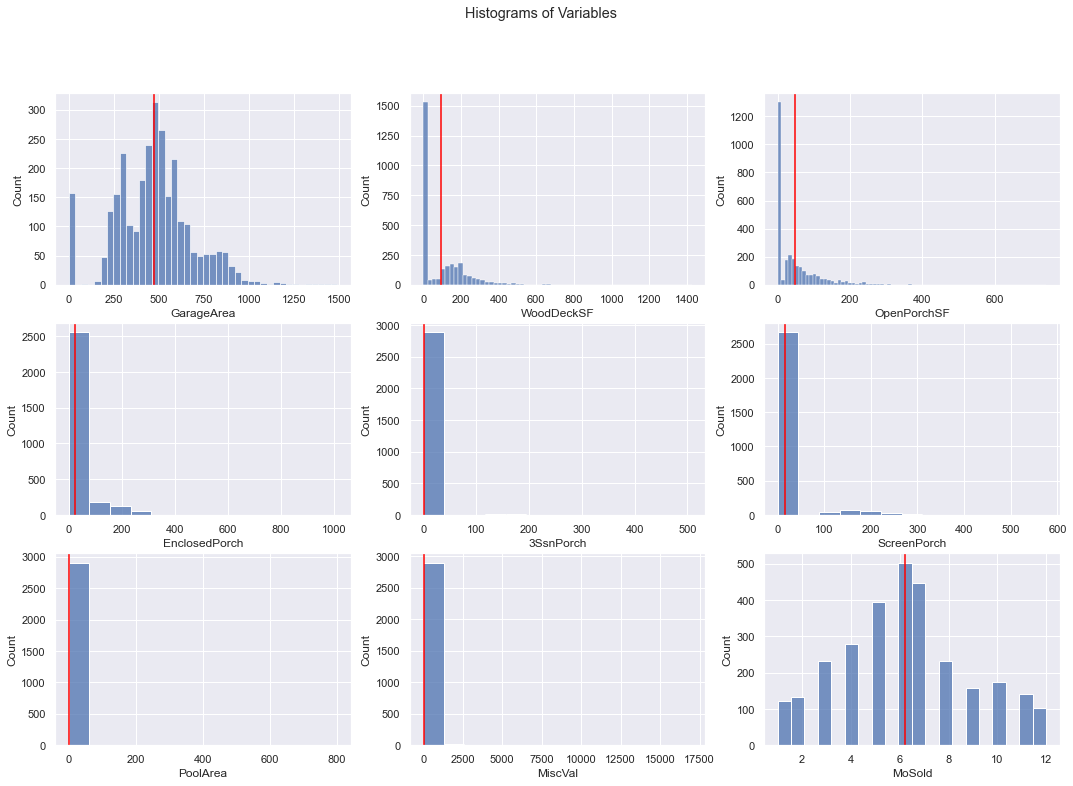

In [13]:
plot_histograms(62)

**Insights:** All distributions except `MoSold` are right skewed. `MoSold` is an interesting variable since it is common in real estate to see houses being sold in summer months because that is when house prices are supposedly at their highest. `MiscVal` is an odd variable since it represents a \\$ value of a miscellaneous feature. Maybe this variable would not be useful for future modeling.

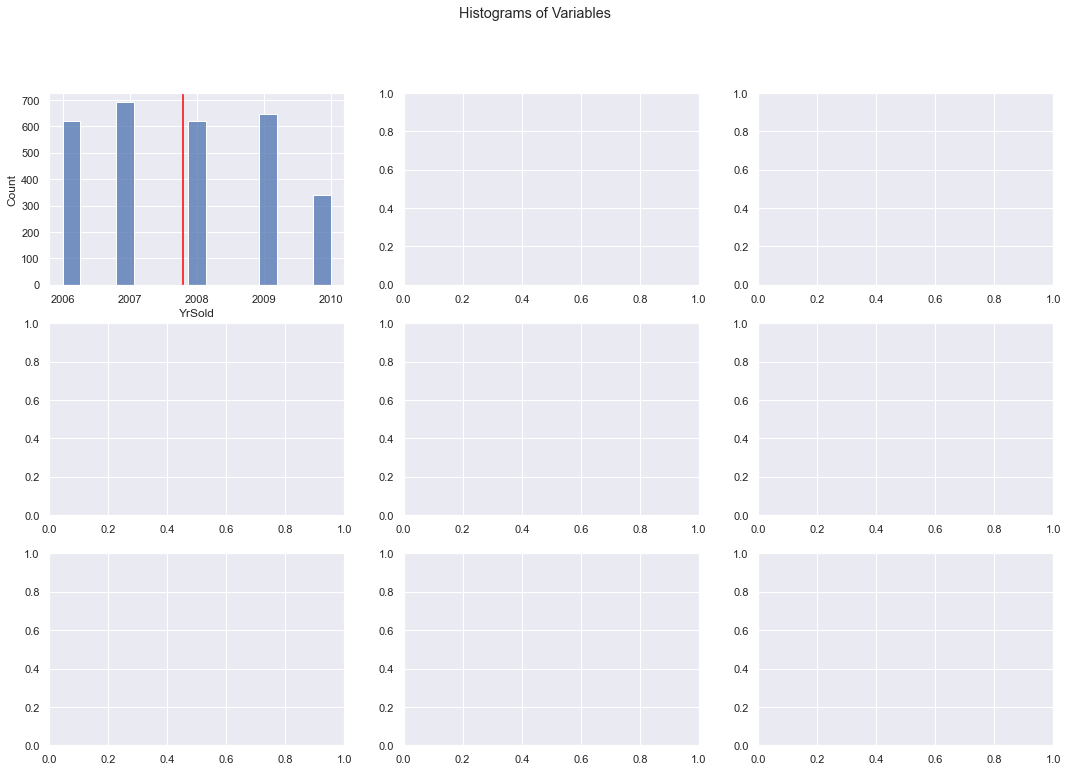

In [14]:
plot_histograms(77)

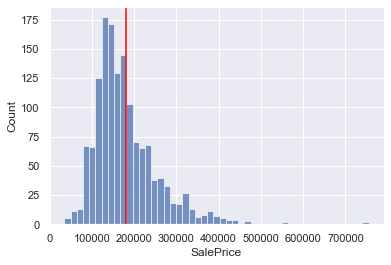

In [15]:
sns.histplot(x="SalePrice", data=train)
plt.axvline(np.mean(sale_price_train), color='red');

**Insights:** The count of houses sold each year is roughly uniform. `SalePrice` is right skewed, and mean is at around \\$200,000. Some outliers for house sale prices may be present.

## 2) Investigate Missing Values and Outliers

To investigate missing values, `df.info()` is the best way to do this, which we did in section 1. For ease, I will reprint it below and discuss the missing values.

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

**Insights:**  As mentioned in section 1, there are not many rows in the train data set (only 1460); the combined data set have a total of 2919 rows. Some columns have many missing values, like Alley, FireplaceQu, PoolQC, Fence, and MiscFeature. We will need to decide if these null values are important; if not, we can drop them and not use them in our model for future assignments.

A good way to investigate outliers is to plot box and whisker plots, which works for numerical variables.

In [17]:
def plot_boxplots(idx, df=data):
    """
    Creates a boxplot grid for variables of interest from the data set. Prints out the next index we need to start
    from.
    
    Inputs:
        idx: int, the starting index
        
    Outputs:
        Boxplot grid for variables of interest.
    """
    fig, axes = plt.subplots(3, 2, figsize=(18, 12))
    fig.suptitle('Boxplots of Variables')
    df_cols = df.columns.to_list()
    for i in np.arange(0, 3):
        for j in np.arange(0, 2):
            # We only have a total of 80 columns
            if idx > 79:
                return
            col = df_cols[idx]

            # Can't plot histograms of objects or strings
            while type(df[[col]].dropna().reset_index(drop=True).loc[0][0]) == str:
                idx += 1
                if idx > 79:
                    return
                col = df_cols[idx]
            # Changing to an array for easy plotting
            col_data = np.array(df[col].tolist())
            sns.boxplot(ax=axes[i,j], x=col_data, data=df)
            axes[i,j].set_xlabel(col)
            idx += 1
    print(f"Next index we need to start from is: {idx}")

Next index we need to start from is: 19


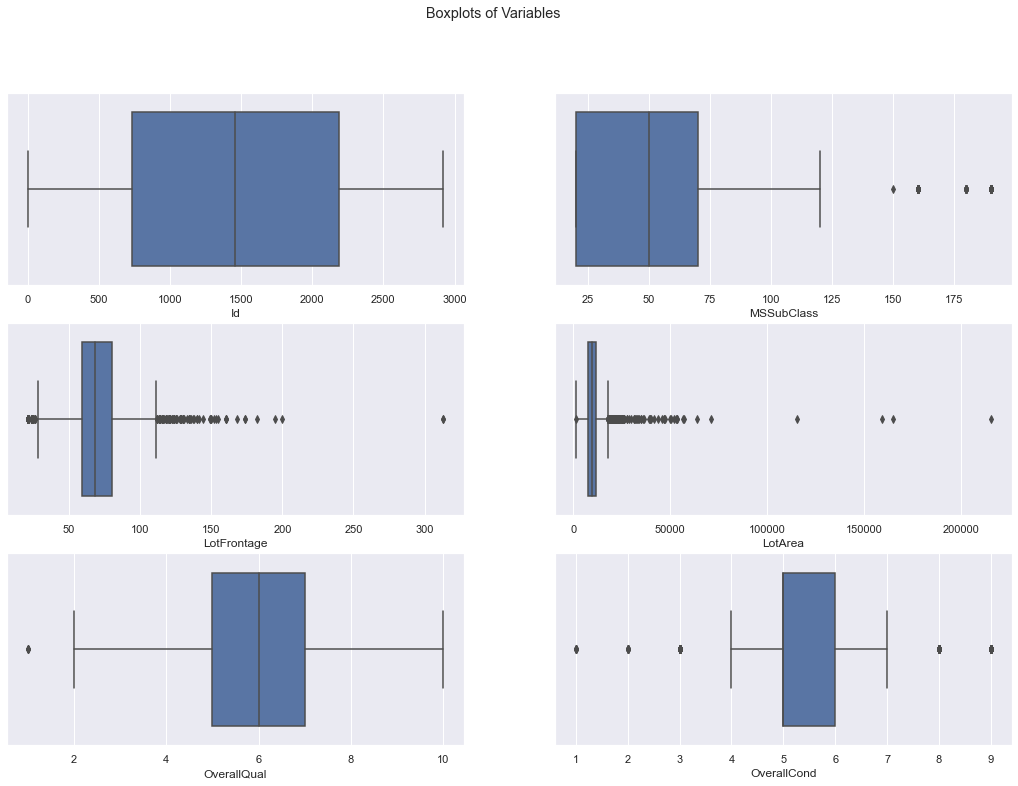

In [18]:
plot_boxplots(0)

**Insights:** `LotFrontage` and `LotArea` have many outliers that should be accounted for when modeling. Maybe some normalization is required for these variables (or all numerical variables).

Next index we need to start from is: 38


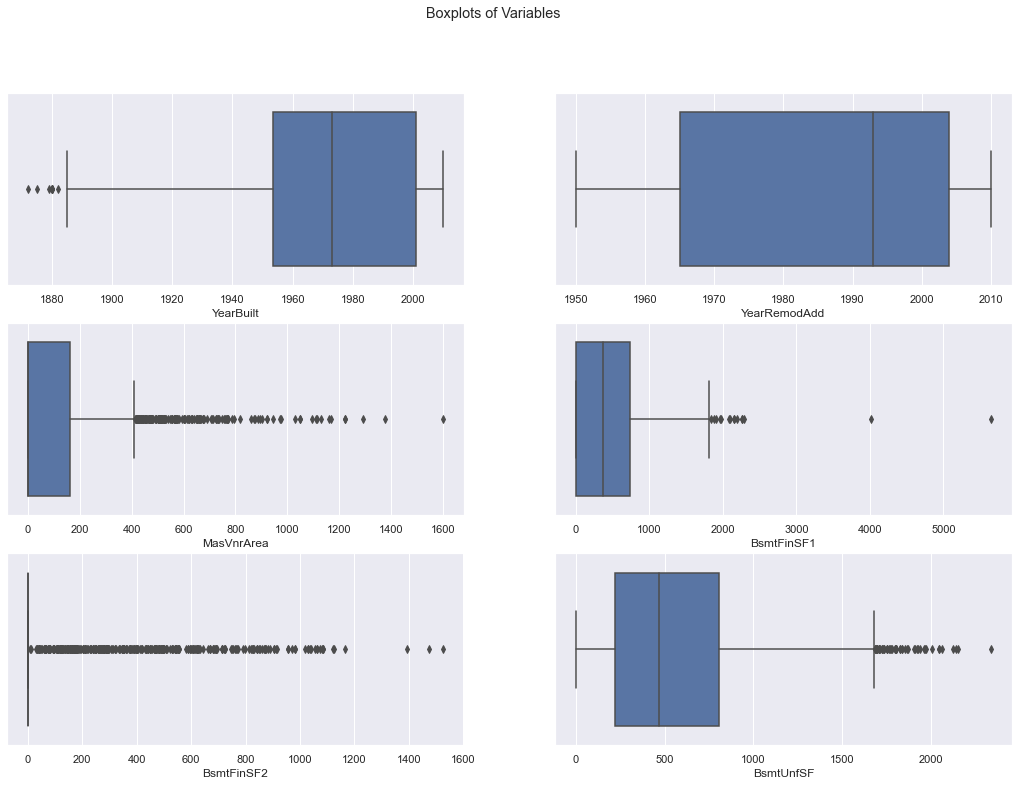

In [19]:
plot_boxplots(19)

**Insights:** `BsmtFinSF2` has the most outliers in this grid plot. From our histogram, we know that this variable has the majority of points at 0. Outliers may indicate some uniqueness. Houses built before (roughly) 1882 are considered outliers. 

Next index we need to start from is: 48


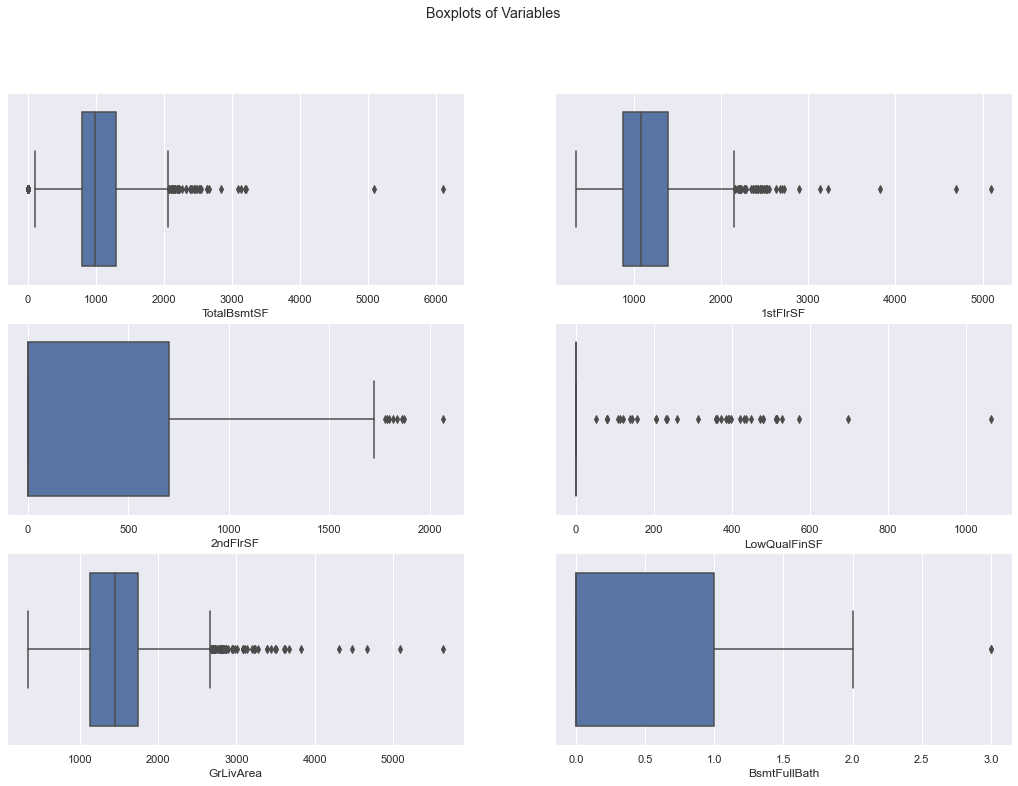

In [20]:
plot_boxplots(38)

**Insights:** When `TotalBsmtSF` is recorded with anything greater than 2000 feet, those points are considered outliers. This is expected and intuitive since we rarely see huge basements within a house. Interesting to note that `1stFlrSF` has many more outliers than `2ndFlrSF`; further, `GrLivArea` with greater than 2500 square feet are considered outliers. The median house size in SQ FT is about 1500.

Next index we need to start from is: 55


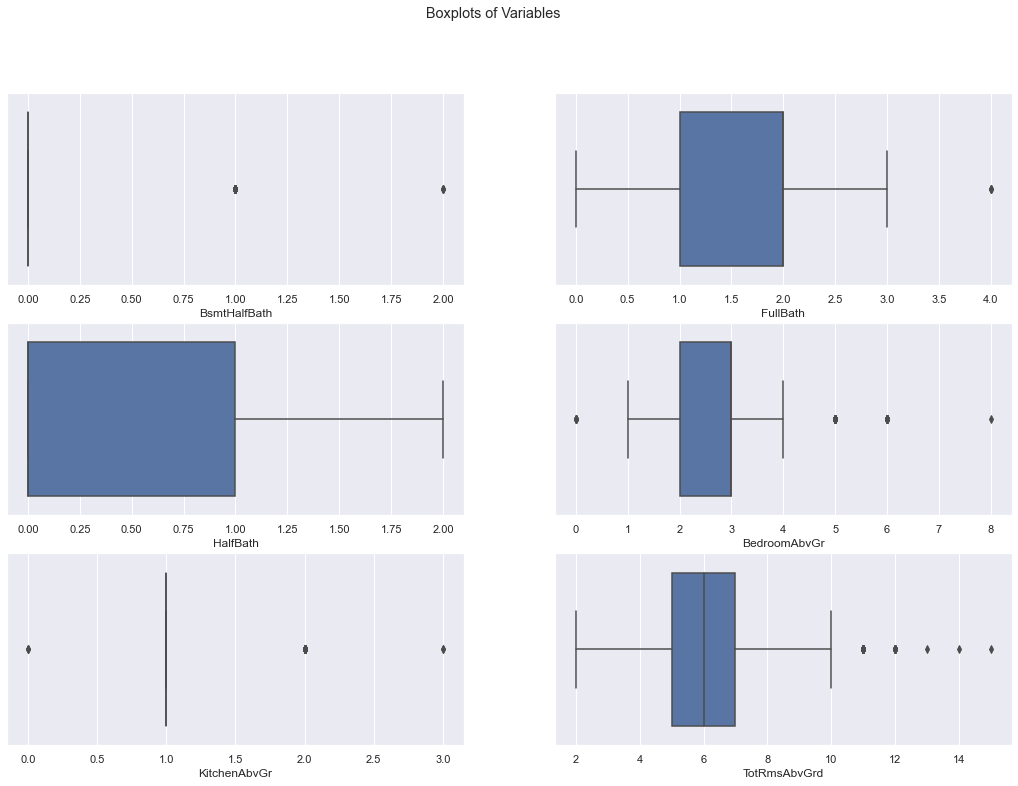

In [21]:
plot_boxplots(48)

**Insights:** Only one house in the data set has 4 full bathrooms. There are no outliers with `HalfBath`. Also, only one house has 0 bedrooms above ground (based on `BedroomAbvGr` boxplot). What does this mean for that house? 

Next index we need to start from is: 68


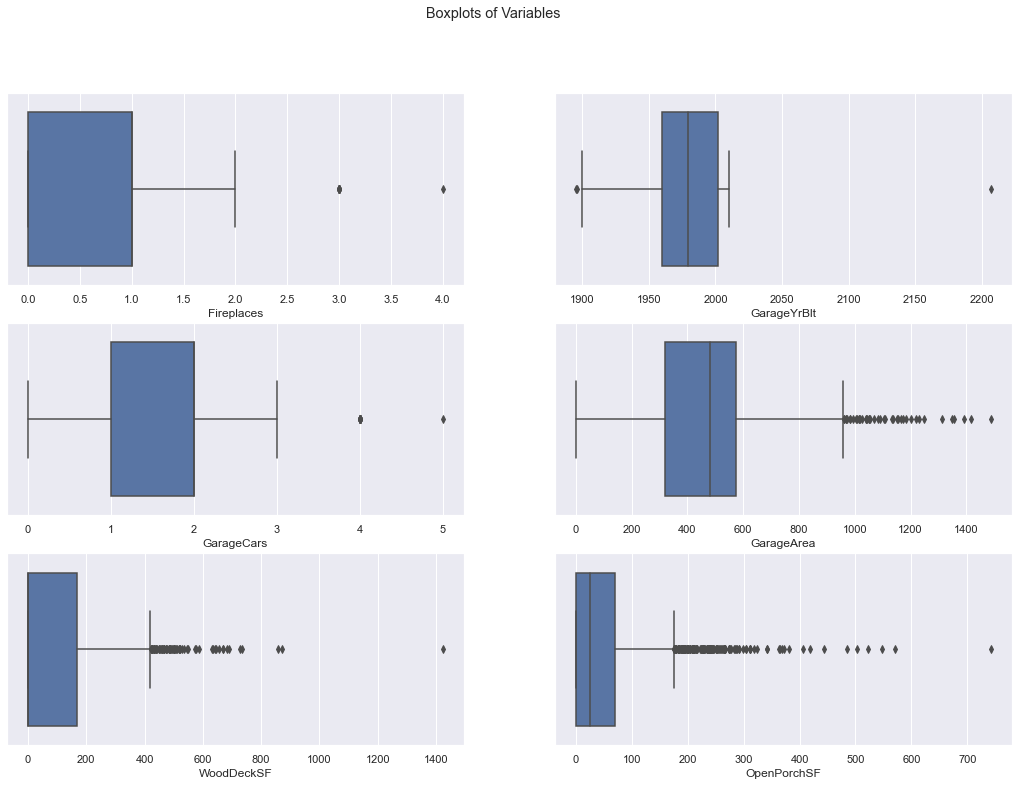

In [22]:
plot_boxplots(55)

In [23]:
test.loc[test['GarageYrBlt'] > 2200][['GarageYrBlt']]

,GarageYrBlt
1132,2207.0


**Insights:** One data point shows that the year a garage was built for one house was after 2200, which seems like an error. This is from the test set, as the code above this cell shows. Many outliers with `GarageArea`, `WoodDeckSF`, and `OpenPorchSF`.

Next index we need to start from is: 77


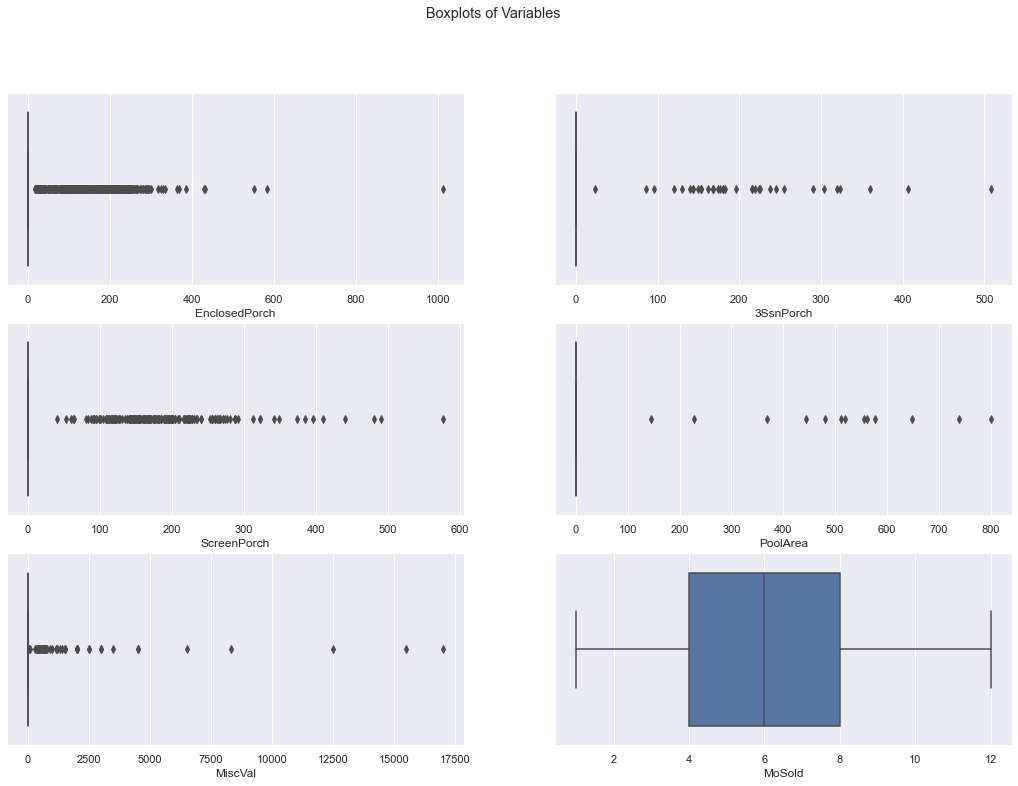

In [24]:
plot_boxplots(68)

**Insights:** Almost all of these variables include numerous outliers. What can we do about these variables?

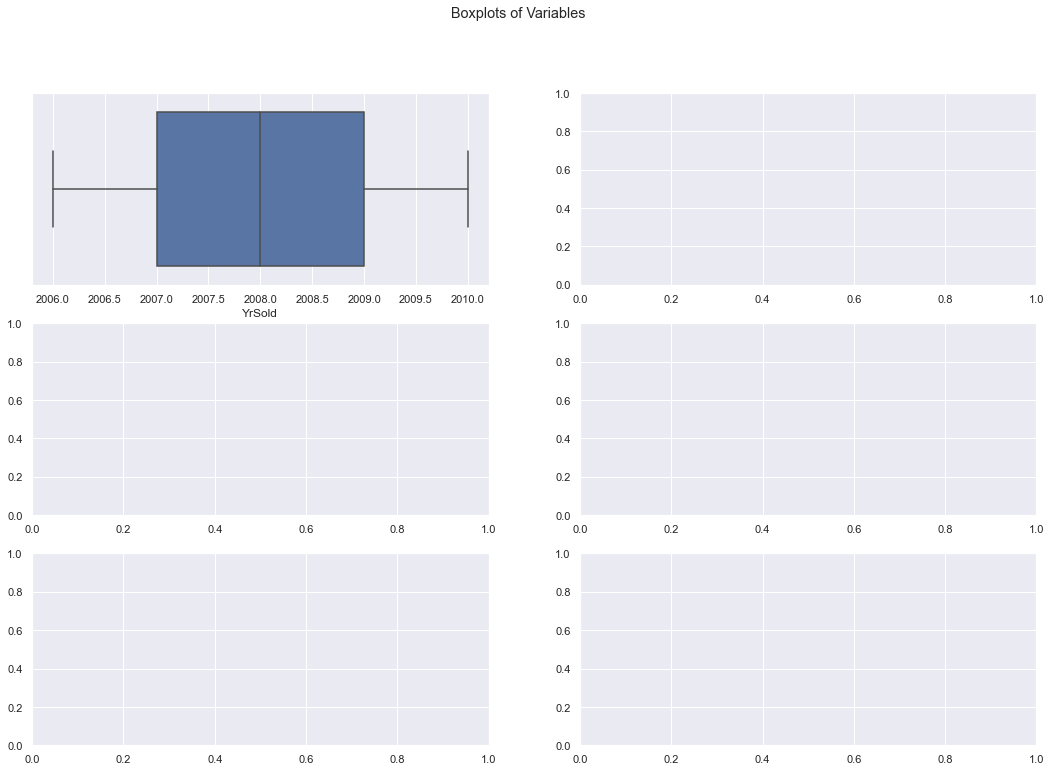

In [25]:
plot_boxplots(77)

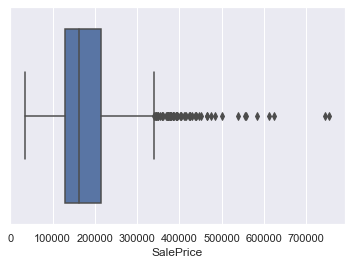

In [26]:
sns.boxplot(x="SalePrice", data=train);

## 3) Investigate At Least 3 Potential Predictors

To look at 3 potential predictors, it is best to only look at the training data. My hypothesis is that the following variables can have a strong effect on SalePrice, and I will show this via scatterplots and correlation heatmaps:
1) `GrLivArea`: Above grade (ground) living area square feet  
2) `FullBath`: Full bathrooms above grade  
3) `LotArea`: Lot size in square feet  
4) `YearRemodAdd`: Remodel date. Note this is the same as `YearBuilt` if no remodel was added. I can create a binary variable of whether or not a house had a remodel.

In [27]:
def plot_scatter_corr(cols, df=train):
    """
    Plots a grid plot with a scatter plot and a line of best fit, along with annotating the correlation value.
    
    Inputs:
        cols: list of size 4, with each item corresponding to a column name
    Outputs:
        Grid plot to show the 4 variables as a scatter plot with respect to SalePrice (only found in `train`)
    """
    fig, axes = plt.subplots(2, 2, figsize=(18, 12))
    fig.suptitle('ScatterPlots of Variables')
    idx = 0
    for i in np.arange(0, 2):
        for j in np.arange(0, 2):
            col = cols[idx]
            df2 = df.dropna(subset=[col])
            sns.regplot(ax=axes[i,j], x=col, y="SalePrice", data=df2)
            axes[i,j].set_xlabel(col + " r = " + str(round(pearsonr(np.array(df2[col].to_list()), 
                                                                    np.array(df2["SalePrice"].to_list()))[0], 2)))
            idx += 1

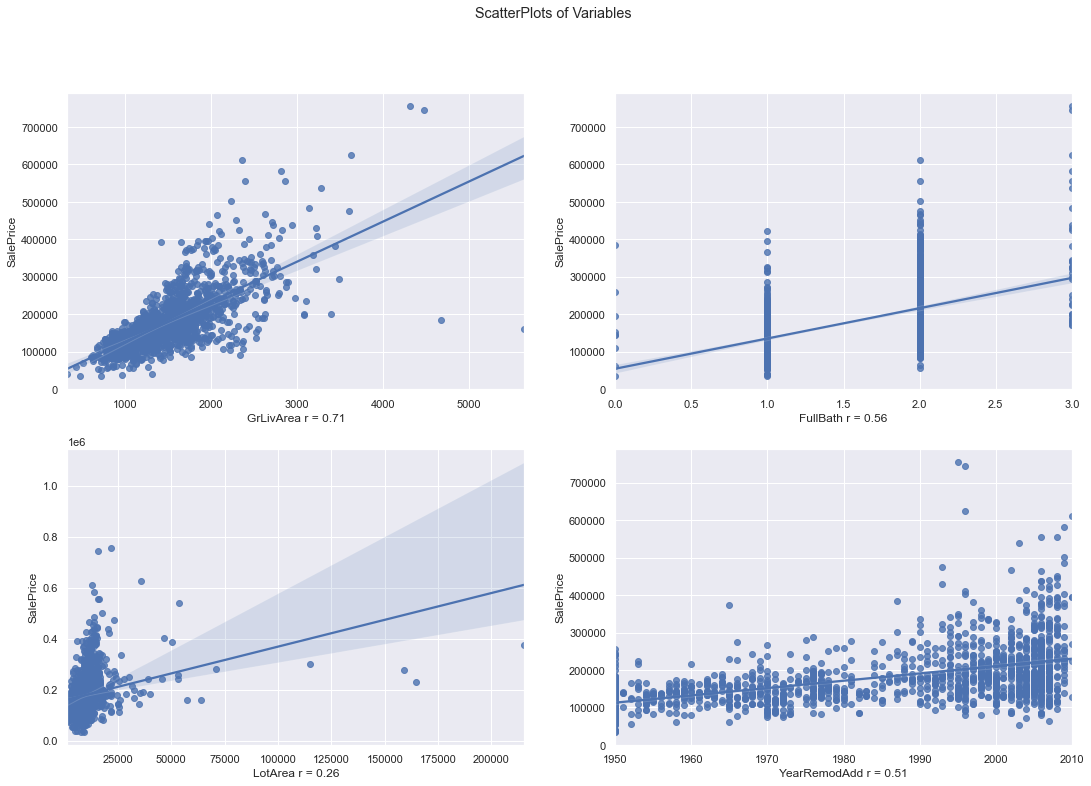

In [28]:
scatter_cols = ["GrLivArea", "FullBath", "LotArea", "YearRemodAdd"]
plot_scatter_corr(scatter_cols)

**Insights:** `FullBath` should not be plotted as a scatter plot since it is an ordinal variable. `LotArea` has a few strong outliers that change the regression line and overall correlation strength, maybe because those houses with large lot areas are more rural or like farmland rather than a typical home. My assumptions that `GrLivArea` and `YearRemodAdd` have a more or less linear relationship with `SalePrice` is correct, indicating that these variables are potenitally strong predictor variables of the target variable.

Some other potential variables I hypothesize would be strong predictor variables for `SalePrice` are:  
1) `LotArea` (if outliers removed)  
2) `LotFrontage`: Linear feet of street connected to property  
3) `1stFlrSF`: First Floor square feet   
4) `2ndFlrSF`: Second floor square feet

In [29]:
def plot_scatter_corr2(cols, df=train):
    """
    Plots a grid plot with a scatter plot and a line of best fit, along with annotating the correlation value.
    
    Inputs:
        cols: list of size 4, with each item corresponding to a column name
    Outputs:
        Grid plot to show the 4 variables as a scatter plot with respect to SalePrice (only found in `train`)
    """
    fig, axes = plt.subplots(2, 2, figsize=(18, 12))
    fig.suptitle('ScatterPlots of Variables')
    idx = 0
    for i in np.arange(0, 2):
        for j in np.arange(0, 2):
            col = cols[idx]
            # To remove outliers of LotArea for just this part of the EDA
            if col == "LotArea":
                df2 = df.loc[df["LotArea"] <= 100000]
                sns.regplot(ax=axes[i,j], x=col, y="SalePrice", data=df2)
                axes[i,j].set_xlabel(col + " r = " + str(round(pearsonr(np.array(df2[col].to_list()), 
                                                                np.array(df2["SalePrice"].to_list()))[0], 2)))
            else:
                df2 = df2.dropna(subset=[col])
                sns.regplot(ax=axes[i,j], x=col, y="SalePrice", data=df2)
                axes[i,j].set_xlabel(col + " r = " + str(round(pearsonr(np.array(df2[col].to_list()), 
                                                                np.array(df2["SalePrice"].to_list()))[0], 2)))
            idx += 1

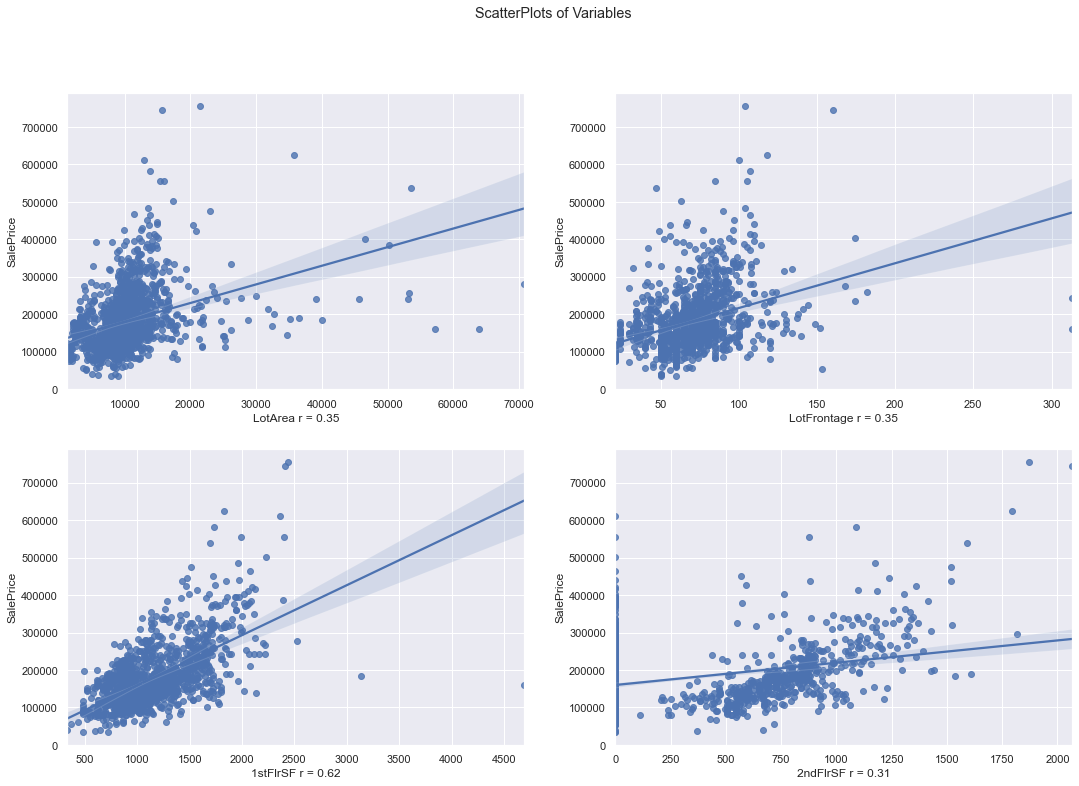

In [30]:
scatter_cols = ["LotArea", "LotFrontage", "1stFlrSF", "2ndFlrSF"]
plot_scatter_corr2(scatter_cols)

Which houses have a lot area greater than 100k square feet?

In [31]:
data.loc[data["LotArea"] >= 99999][["GrLivArea", "FullBath", "YearRemodAdd", "LotArea", 
                                    "LotFrontage", "1stFlrSF", "2ndFlrSF"]]

,GrLivArea,FullBath,YearRemodAdd,LotArea,LotFrontage,1stFlrSF,2ndFlrSF
249,2144,2,2006,159000,NaN,1444,700
313,2036,2,1965,215245,150.0,2036,0
335,1786,2,1965,164660,NaN,1619,167
706,1824,2,2002,115149,NaN,1824,0


**Recap:**  
We have found that some potential predictor variables for `SalePrice` are:  
1) GrLivArea  
2) YearRemodAdd  
3) 1stFlrSF  
Some other variables, such as 2ndFlrSF, could potentially be a predictor variable if some feature engineering is done that considers whether or not a house has a 2nd floor. Since so many houses don't have a 2nd floor, the correlation is weaker because many points are plotted at 0.

## 4) Feature Creation and Engineering

As I mentioned in the previous section, a potential feature we could create is whether or not a house has a 2nd floor. 

In [32]:
# creating the Has2ndFlr feature, and checking whether it was applied properly
data["Has2ndFlr"] = data[["2ndFlrSF"]].apply(lambda x: x > 0)
data[["2ndFlrSF", "Has2ndFlr"]].head()

,2ndFlrSF,Has2ndFlr
0,854,True
1,0,False
2,866,True
3,756,True
4,1053,True


**Drawbacks:** The 2nd floor SQ FT is captured by the variable `GrLivArea`. Will it really be neccessary to do this? Maybe it is useful for decision tree modeling.

We could technically do the same for the basement.

In [33]:
# creating the Has2ndFlr feature, and checking whether it was applied properly
data["HasBsmt"] = data[["TotalBsmtSF"]].apply(lambda x: x > 0)
data[["TotalBsmtSF", "HasBsmt"]].head()

,TotalBsmtSF,HasBsmt
0,856.0,True
1,1262.0,True
2,920.0,True
3,756.0,True
4,1145.0,True


In [34]:
# double checking
data.loc[data["HasBsmt"] == False][["TotalBsmtSF", "HasBsmt"]].head()

,TotalBsmtSF,HasBsmt
17,0.0,False
39,0.0,False
90,0.0,False
102,0.0,False
156,0.0,False


## 5)  Min-Max and Standard Scaling

First, let's perform **min-max scaling**, which involves the following formula:
$$ X' = \frac{X - X_{min}}{X_{max} - X_{min}} $$
We can use the `sci-kit learn` library to perform this rather than hard-coding.

In [35]:
def find_numerical_columns(df):
    """
    Finds columns that are numerical within our data set to transform it in the future.
    
    Input:
        df: a DataFrame, which can be either `train`, `test`, or `data`
    
    Output:
        num_cols: list, contains names of columns that have numerical values
    """
    df_cols = df.columns.to_list()
    num_cols = []
    for c in df_cols:
        if type(df[[c]].dropna().reset_index(drop=True).loc[0][0]) == str:
            continue
        else:
            num_cols.append(c)
    return num_cols

In [36]:
def normalize(df):
    # norm = MinMaxScaler()
    num_cols = find_numerical_columns(df)
    # scikit-learn doesn't seem to be scaling properly
    # norm_data = norm.fit_transform(df.loc[:, num_cols]) 
    for c in num_cols:
        xmin = min(df[c])
        xmax = max(df[c])
        df[c] = df[c].apply(lambda x: (x - xmin) / (xmax - xmin))
    return df

In [37]:
data_norm = normalize(data)
data_norm.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Has2ndFlr,HasBsmt
0,0.000000,0.235294,RL,0.150685,0.033420,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0.0,0.090909,0.50,WD,Normal,1.0,1.0
1,0.000343,0.000000,RL,0.202055,0.038795,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0.0,0.363636,0.25,WD,Normal,0.0,1.0
2,0.000685,0.235294,RL,0.160959,0.046507,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0.0,0.727273,0.50,WD,Normal,1.0,1.0
3,0.001028,0.294118,RL,0.133562,0.038561,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0.0,0.090909,0.00,WD,Abnorml,1.0,1.0
4,0.001371,0.235294,RL,0.215753,0.060576,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0.0,1.000000,0.50,WD,Normal,1.0,1.0


In [38]:
data_norm.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Has2ndFlr,HasBsmt
1454,0.998629,0.823529,RM,0.000000,0.002973,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0.000000,0.454545,0.0,WD,Normal,1.0,1.0
1455,0.998972,0.823529,RM,0.000000,0.002776,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0.000000,0.272727,0.0,WD,Abnorml,1.0,1.0
1456,0.999315,0.000000,RL,0.476027,0.087406,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0.000000,0.727273,0.0,WD,Abnorml,0.0,1.0
1457,0.999657,0.382353,RL,0.140411,0.042726,Pave,NaN,Reg,Lvl,AllPub,...,NaN,MnPrv,Shed,0.041176,0.545455,0.0,WD,Normal,0.0,1.0
1458,1.000000,0.235294,RL,0.181507,0.038921,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0.000000,0.909091,0.0,WD,Normal,1.0,1.0


Let's create some histograms to ensure that our data has been properly scaled.

Next index we need to start from is: 27


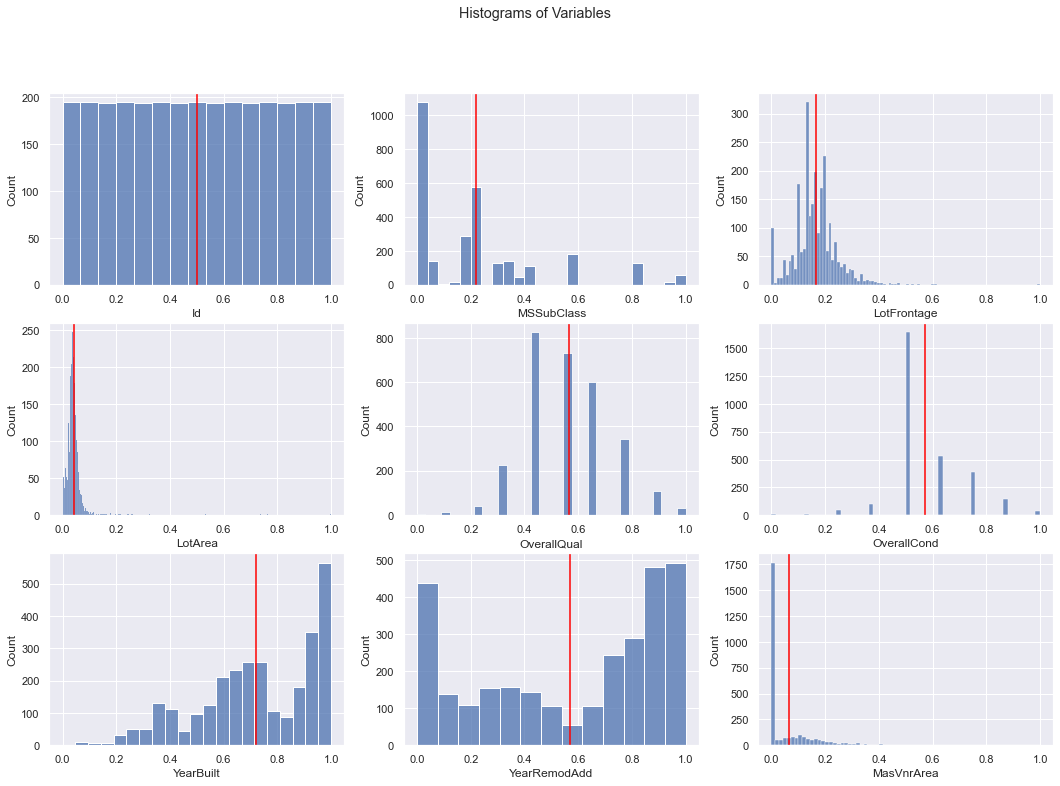

In [39]:
plot_histograms(0, data_norm)

Now, lets **standardize** our data. This involves a different formula, as shown below:
$$ X' = \frac{X - \mu}{\sigma}$$

In [40]:
def standardize(df):
    # norm = StandardScaler()
    num_cols = find_numerical_columns(df)
    # norm_data = norm.fit_transform(df.loc[:, num_cols])
    for c in num_cols:
        mean = np.mean(df[c])
        std = np.std(df[c])
        df[c] = df[c].apply(lambda x: (x - mean) / std)
    return df

In [41]:
data_stand = standardize(data)
data_stand.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Has2ndFlr,HasBsmt
0,-1.731458,0.067331,RL,-0.184481,-0.217879,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,-0.089592,-1.552184,0.157646,WD,Normal,1.154701,0.166784
1,-1.730271,-0.873616,RL,0.458190,-0.072044,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,-0.089592,-0.446925,-0.602962,WD,Normal,-0.866025,0.166784
2,-1.729084,0.067331,RL,-0.055946,0.137197,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,-0.089592,1.026753,0.157646,WD,Normal,1.154701,0.166784
3,-1.727897,0.302568,RL,-0.398704,-0.078385,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,-0.089592,-1.552184,-1.363569,WD,Abnorml,1.154701,0.166784
4,-1.726711,0.067331,RL,0.629569,0.518903,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,-0.089592,2.132012,0.157646,WD,Normal,1.154701,0.166784


Let's create some histograms to ensure that our data has been properly scaled.

Next index we need to start from is: 27


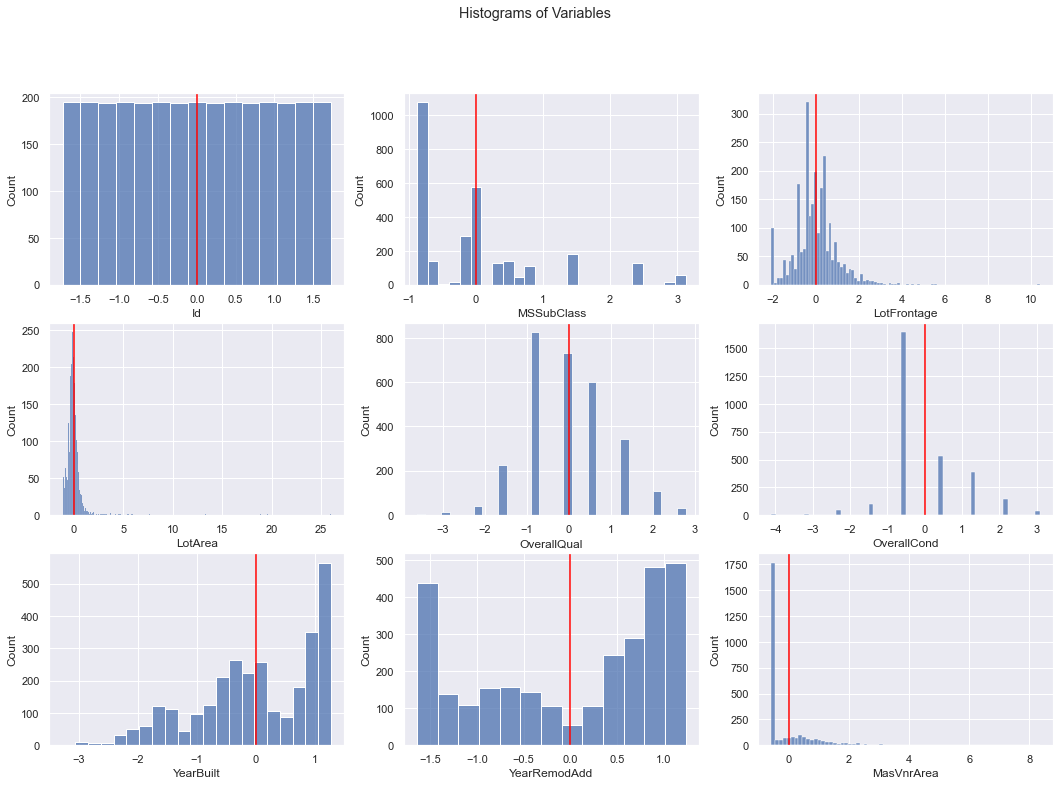

In [42]:
plot_histograms(0, data_stand)

**Insights:** Based on what I know about the data, normalization seems more appropriate. This is because standardization is more appropriate when data represents a normal, Gaussian curve. Based on our initial histograms at the very beginning of this notebook, most data is not Gaussian and is highly skewed. However, it is important to consider both normalization and standardization when modeling because standardization is less impacted by outliers, and many variables have severe outliers. To see which machine learning algorithms are senstive or insensitive to scaling, refer to this [Medium article](https://medium.com/technofunnel/what-when-why-feature-scaling-for-machine-learning-standard-minmax-scaler-49e64c510422).

In [43]:
# pandas throws me an error if I don't do this
train_copy = train.copy()

train_norm = data_norm.copy().iloc[:len(train), :]
test_norm = data_norm.copy().iloc[len(train):, :]
train_norm.loc[:, "SalePrice"] = train_copy.loc[:, "SalePrice"]

train_stand = data_stand.copy().iloc[:len(train), :]
test_stand = data_norm.copy().iloc[len(train):, :]
train_stand.loc[:, "SalePrice"] = train_copy.loc[:, "SalePrice"]

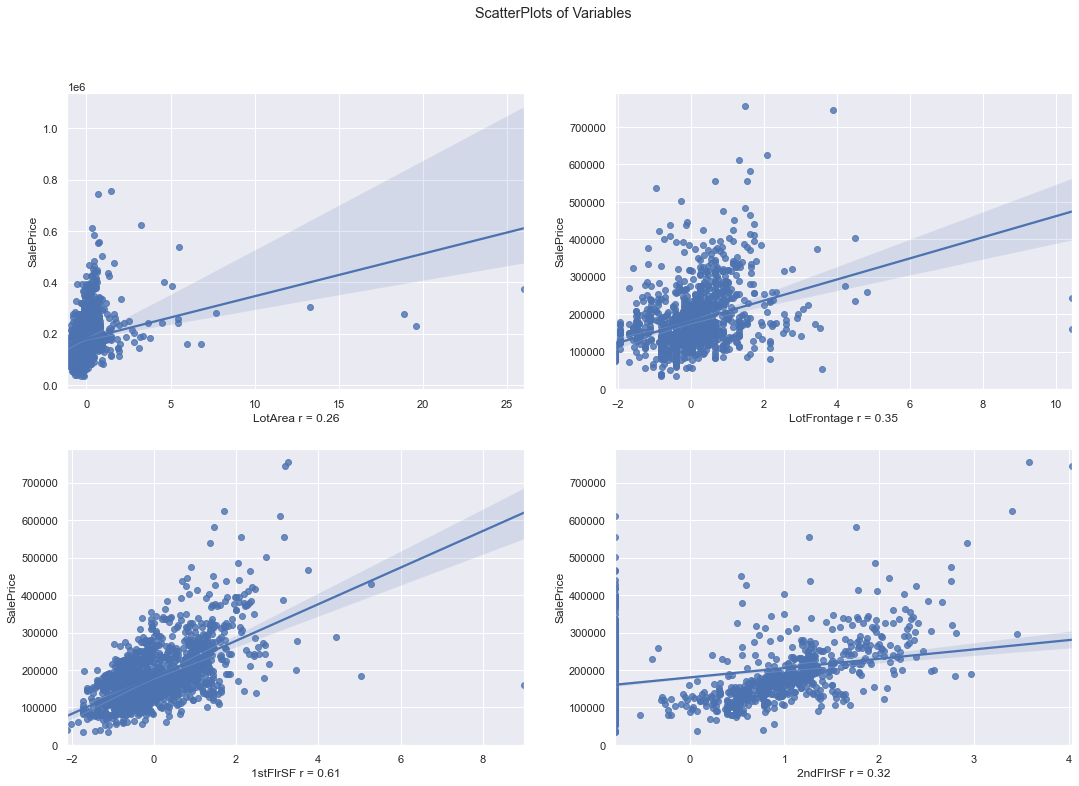

In [44]:
scatter_cols = ["LotArea", "LotFrontage", "1stFlrSF", "2ndFlrSF"]
plot_scatter_corr(scatter_cols, df=train_norm)